<a href="https://colab.research.google.com/github/sesael/image-classifier-project/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata

import pickle
import cv2
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from imutils import paths
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed

In [3]:
#Importing API Key

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"edgardogomez","key":"1a9e6201e95c6ca442440b84c1d3be5d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:09<00:00, 106MB/s]
100% 812M/812M [00:09<00:00, 87.7MB/s]


In [6]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [7]:
!unzip train.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/do

In [8]:
!unzip test1.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/55

In [9]:
train_set_path = sorted(list(paths.list_images('train')))
test_set_path = sorted(list(paths.list_images('test1')))

In [10]:
random.shuffle(train_set_path)
random.shuffle(test_set_path)

In [11]:
train_set_path[0]

'train/dog.3929.jpg'

In [12]:
train_list = []
train_labels = []

for ip in train_set_path[0:1500]:
  image_read = plt.imread(ip)
  image_read = cv2.resize(image_read,(200,200))
  image_read = image_read/255
  label = ip.split("/")[1].split(".")[0]
  label = 1 if label == 'dog' else 0
  train_labels.append(label)
  train_list.append(image_read)
X_data = np.array(train_list)
y_data = np.array(train_labels)

In [13]:
indices = np.arange(X_data.shape[0])
np.random.shuffle(indices)
X_data = X_data[indices]
y_data = y_data[indices]

In [14]:
X_data.shape

(1500, 200, 200, 3)

In [15]:
test_list = []
test_labels = []

for ip in test_set_path[0:1500]: #Colab wouldn't take a higher ammount of pictures than this
  image_read = plt.imread(ip)
  image_read = cv2.resize(image_read,(200,200))
  image_read = image_read/255
  label = ip.split("/")[1].split(".")[0]
  label = 1 if label == 'dog' else 0
  test_labels.append(label)
  test_list.append(image_read)
X_test_blind = np.array(train_list)


In [16]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42)

In [17]:
X_train = X_train.reshape(X_train.shape[0], -1) # -1 is a trick to take all the data
X_test = X_test.reshape(X_test.shape[0], 120000)

In [18]:
X_train.shape, X_test.shape

((1200, 120000), (300, 120000))

In [19]:
model = Sequential()
model.add(Dense(128,input_dim=120000,activation='relu')) #relu is the activation that better works with computer vision
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │      15,360,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,368,449 (58.63 MB)

 Trainable params: 15,368,449 (58.63 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=20, batch_size=32, validation_split=.2)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - accuracy: 0.5123 - loss: 10.9774 - val_accuracy: 0.5417 - val_loss: 1.4429
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 412ms/step - accuracy: 0.5000 - loss: 3.0730 - val_accuracy: 0.4625 - val_loss: 1.9484
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.5812 - loss: 1.5787 - val_accuracy: 0.5458 - val_loss: 1.0978
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.6139 - loss: 1.0808 - val_accuracy: 0.4667 - val_loss: 1.6232
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 355ms/step - accuracy: 0.5703 - loss: 1.1505 - val_accuracy: 0.5250 - val_loss: 1.1744
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.6615 - loss: 0.7836 - val_accuracy: 0.5292 - val_loss: 1.6813
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 0.5426 - loss: 2.2385 - val_accuracy: 0.5292 - val_loss: 1.9119
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.6669 - loss: 0.9218 - val_accur

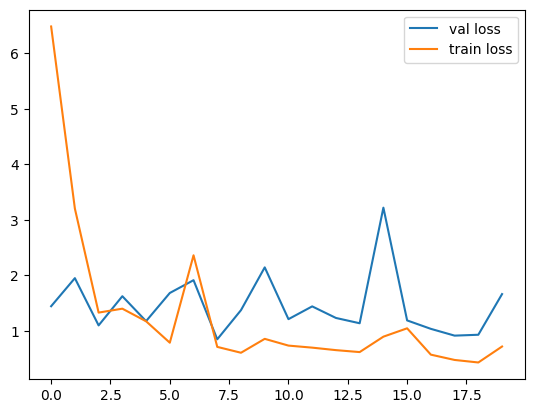

In [23]:
plt.plot(history.history["val_loss"], label="val loss")
plt.plot(history.history["loss"], label="train loss")
plt.legend()
plt.show()

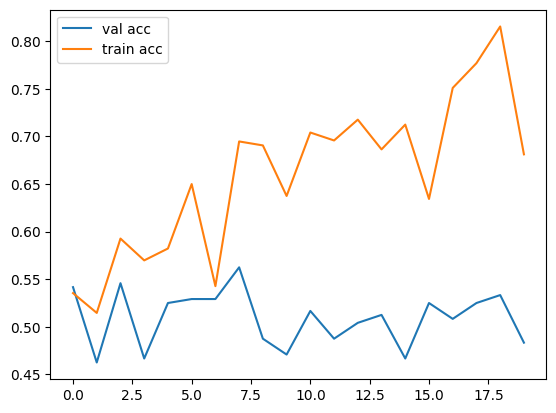

In [24]:
plt.plot(history.history["val_accuracy"], label="val acc")
plt.plot(history.history["accuracy"], label="train acc")
plt.legend()
plt.show()

In [25]:
model.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5533 - loss: 1.3286


[1.2770999670028687, 0.5666666626930237]